In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.linear_model import LogisticRegression, Lasso
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


In [32]:
df = pd.read_csv('/mnt/ncshare/ozkilim/BRCA/data/tasks/BRCA_pos_neg_FFPE.csv')  # Or load your DataFrame by other means
feature_cols = ["Signature.1", "Signature.2", "Signature.3", "Signature.5", "Signature.8", "Signature.13", "Microhomology2", "Microhomology2ratio", "Del/ins-ratio", "Del10-ratio", "HRD-LOH", "Telomeric.AI", "LST", "DBS2", "DBS4", "DBS5", "DBS6", "DBS9", "SBS1", "SBS2", "SBS3", "SBS5", "SBS8", "SBS13", "SBS18", "SBS26", "SBS35", "SBS38", "SBS39", "SBS40", "SBS41", "ID1", "ID2", "ID4", "ID8"]
# feature_cols = ["LST","Microhomology2ratio","HRD-LOH","Telomeric.AI","Del10-ratio","Signature.3","Del/ins-ratio","Signature.8"]
len(df["case_id"].unique())
df = df.groupby('case_id').first().reset_index()
len(df)

kf = KFold(n_splits=5)

In [11]:
# take one row onbly for each patient.
# Randomly shuffle the list of groups
X =  df[feature_cols]
y = df['DSS'] #try braca staatus also!

stratify_col = df['case_id']  # This is the column you're stratifying by

lasso = Lasso(alpha=0.001)
auc_scores = []

for train_index, test_index in kf.split(X, stratify_col):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)

    auc = roc_auc_score(y_test, y_pred)

    auc_scores.append(auc)

average_mse = sum(auc_scores) / len(auc_scores)
print("Average MSE:", average_mse)

KeyError: 'DSS'

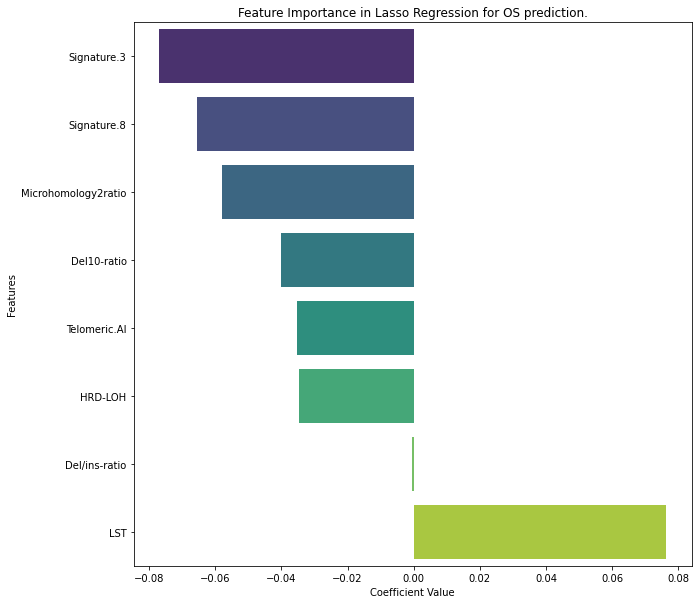

In [ ]:


coefficients = lasso.coef_

# Create a DataFrame for the feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': coefficients
})
feature_importance_df = feature_importance_df.sort_values(by='Importance')

# Plotting using Seaborn
plt.figure(figsize=(10, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance in Lasso Regression for OS prediction.')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()

In [33]:
# repete for BRCA pred... 
# print(len(df))
# df = df[df['brca_status']!='intact']  #intact are the hard samples! 
# print(len(df))

df['BRCA_bin_status'] = df['brca_status'].apply(lambda x: 1 if x in ['positive'] else 0)

df["BRCA_bin_status"].value_counts()

0    47
1    25
Name: BRCA_bin_status, dtype: int64

In [34]:
# take one row onbly for each patient.
# Randomly shuffle the list of groups
X =  df[feature_cols]
y = df['BRCA_bin_status'] #try braca staatus also!

stratify_col = df['case_id']  # This is the column you're stratifying by

lasso = Lasso(alpha=0.01)
auc_scores = []

for train_index, test_index in kf.split(X, stratify_col):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)

    auc = roc_auc_score(y_test, y_pred)

    auc_scores.append(auc)

average_mse = sum(auc_scores) / len(auc_scores)
print("Average AUC:", average_mse)

print(auc_scores)

#this then needs to be tested on help out genomic set.... easy task when only Quiscent ...

Average AUC: 0.6781457431457432
[0.8571428571428571, 0.5, 0.6363636363636364, 0.6222222222222222, 0.775]


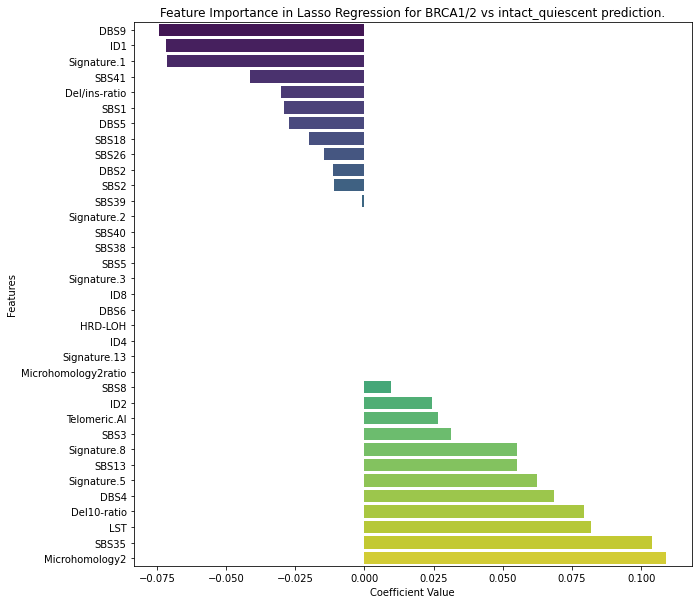

In [30]:
coefficients = lasso.coef_

# Create a DataFrame for the feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': coefficients
})
feature_importance_df = feature_importance_df.sort_values(by='Importance')

# Plotting using Seaborn
plt.figure(figsize=(10, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance in Lasso Regression for BRCA1/2 vs intact_quiescent prediction.')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()